In [1]:
from PIL import Image, ImageOps
import webdataset as wds
import pytesseract
from itertools import islice
import editdistance
import utils
from IPython.display import display, Image, Markdown


---

4 1 69


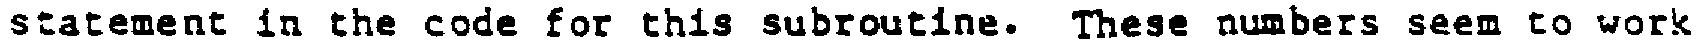

statement in the code for this subroutine. These numbers seem to work

Statement in the code for this subroutine. These numbers seem to work


---

17 1 43


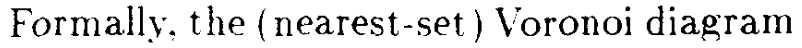

Formally, the (nearest-set) Voronoi diagram

Formally, the (nearest-set ) Voronoi diagram


---

24 1 66


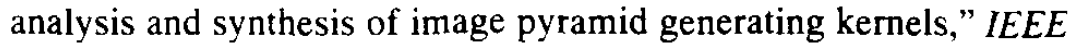

analysis and synthesis of image pyramid generating kernels,'' IEEE

analysis and synthesis of image pyramid generating kernels,” JEEE


---

30 1 22


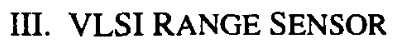

III. VLSI RANGE SENSOR

II. VLSI RANGE SENSOR


---

40 3 77


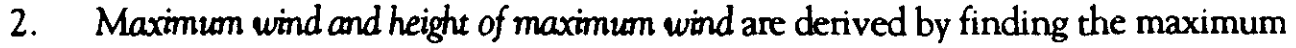

2. Maximum wind and height of maximum wind are derived by finding the maximum

Maximum wind and height of maximum wind are derived by finding the maximum


---

56 1 64


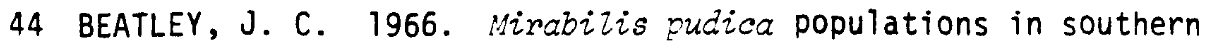

44 BEATLEY, J. C. 1966. Mirabilis pudica populations in southern

44 BEATLEY, J. C. 1966. Mtrabilis pudica populations in southern


---

85 2 2


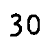

30

---

87 1 48


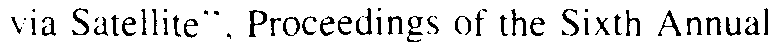

via Satellite'', Proceedings of the Sixth Annual

via Satellite’, Proceedings of the Sixth Annual


---

97 2 2


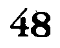

48

---

105 1 8


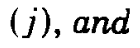

(j), and

(7), and


---

116 2 60


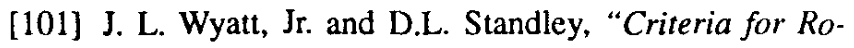

[101] J. L. Wyatt, Jr. and D.L. Standley, ''Criteria for Ro-

(101) J. L. Wyatt, Jr. and D.L. Standley, “Criteria for Ro-


---

140 2 31


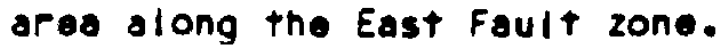

area along the East Fault zone.

area aiong the East Fauit zone.


---

185 1 69


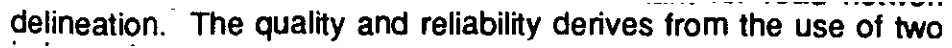

delineation. The quality and reliability derives from the use of two,

delineation. The quality and reliability derives from the use of two


---

187 1 1


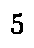

5

---

191 2 50


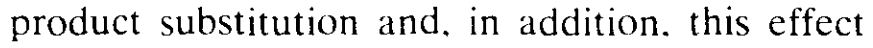

product substitution and, in addition, this effect

product substitution and. in addition. this effect


In [2]:
show = True

dataset = wds.WebDataset("./uw3-test.tar").decode("pil")
ocrerrs = utils.OCRErrors()
for i, sample in enumerate(islice(dataset, 200)):
    image = ImageOps.invert(sample["png"])
    gt = sample["txt"]
    pred = pytesseract.image_to_string(image)
    errs = ocrerrs.add(pred, gt)[0]
    if show and errs > 0:
        display(Markdown("---"))
        print(i, errs, len(gt))
        display(image)
        display(Markdown(gt))
        display(Markdown(pred))


In [4]:
print(ocrerrs)

Normalized: 22/9277 (0.0024)
Text only: 14/8975 (0.0016)


In [10]:
show = False

dataset = wds.WebDataset("./clean-test.tar").decode("pil")
ocrerrs = utils.OCRErrors()
for i, sample in enumerate(islice(dataset, 200)):
    # image = ImageOps.invert(sample["png"])
    image = sample["png"]
    gt = sample["json"]["text"]
    pred = pytesseract.image_to_string(image)
    errs = ocrerrs.add(pred, gt)[0]
    if show and errs > 0:
        display(Markdown("---"))
        print(i, errs, len(gt))
        display(image)
        display(Markdown(gt))
        display(Markdown(pred))

print(ocrerrs)

Normalized: 573/9671 (0.0592)
Text only: 517/9535 (0.0542)
